# Classification problem 
We will follow with loan dataset from [Practical Statistics for Data Scientists: 50 Essential Concepts](https://www.amazon.com/Practical-Statistics-Data-Scientists-Essential/dp/1491952962)

### Problem
I found it had to...

### Approach 
We are going to create simple classification nodebook which will tell us if loan ends paid off or default. In order to make it happen we need to load dataset, so lets strat with basic imports:

In [1]:
import numpy as np
import pandas as pd

Lets use pandas which is standard choice in python word to operate on data. It's always good to see ```head``` of data grab insights. In this case we have ```Unnamed: 0``` looks like it might be an index column.

In [114]:
df = pd.read_csv("/Users/mjancy/Documents/statistics_for_data_scientists/psds_data/loan_data.csv")
df.columns

Index(['Unnamed: 0', 'status', 'loan_amnt', 'term', 'annual_inc', 'dti',
       'payment_inc_ratio', 'revol_bal', 'revol_util', 'purpose',
       'home_ownership', 'delinq_2yrs_zero', 'pub_rec_zero', 'open_acc',
       'grade', 'outcome', 'emp_length', 'purpose_', 'home_', 'emp_len_',
       'borrower_score'],
      dtype='object')

Let's check if ```Unnamed: 0``` contains only unique values

In [110]:
df[df['Unnamed: 0'].duplicated()].size

0

By knowing that fist column in our dataset is unique numerci one we can simply use it as a index during data read.

In [118]:
df = pd.read_csv("/Users/mjancy/Documents/statistics_for_data_scientists/psds_data/loan_data.csv", index_col=0)
df.head()

,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,RENT,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,OWN,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,RENT,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,RENT,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,RENT,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


Lets check corelations in our dataset by simply calling ```corr``` function on our data frame:

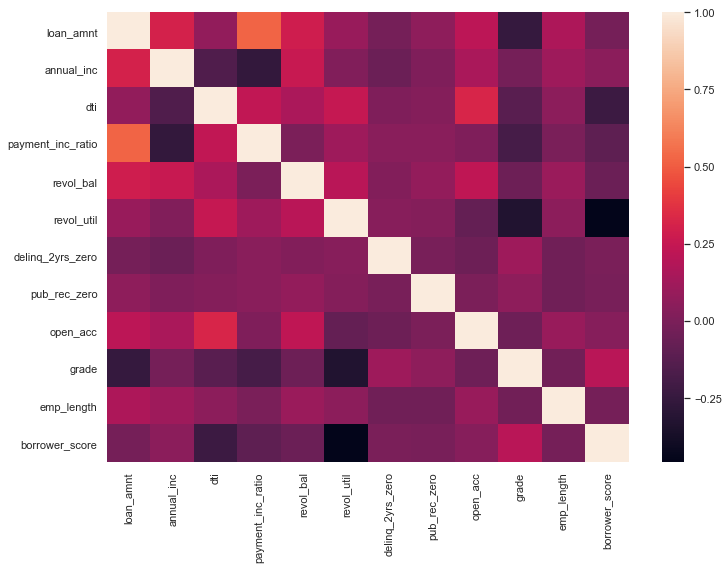

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(df.corr())

Looks like for **categorical** columns we don't have correlations caluclated, let's addresse this porblem 

# Categorical variables

We have vaiables like ```purpose``` where instead numeric values we have named values (*objects*), in this case we need to encode them into numerical form in order to have models woking correctly.

In [122]:
df.dtypes

status                object
loan_amnt              int64
term                  object
annual_inc             int64
dti                  float64
payment_inc_ratio    float64
revol_bal              int64
revol_util           float64
purpose               object
home_ownership        object
delinq_2yrs_zero       int64
pub_rec_zero           int64
open_acc               int64
grade                float64
outcome               object
emp_length             int64
purpose_              object
home_                 object
emp_len_              object
borrower_score       float64
dtype: object

So by knowing that ```object``` columns are ```categorical```one we can just simple search for all coluns of this type and have this work done.

In [124]:
import numpy as np

categorical_columns = np.array(df.columns[df.dtypes == object])
numerical_columns = np.array(df.columns[df.dtypes != object])
all_columns = df.columns

Now for categorical columns we want to assign them numbers instead object so somethink like that ```[a, b, a, c]``` goes to ```[1, 2, 1, 3]```. To achieve that we will use ```LabelEncoder``` from ```sklearn.preprocessing``` package and it will hapen in given steps:

In [158]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
df_categorical_columns = df[categorical_columns].apply(lambda x: d[x.name].fit_transform(x))

# combain categorical columns with numerci ones to get whole dataset once again
df_encoded = pd.concat([df[numerical_columns], df_categorical_columns], axis=1)

# check look and feel of it
df_encoded.head()

,loan_amnt,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,emp_length,borrower_score,status,term,purpose,home_ownership,outcome,purpose_,home_,emp_len_
1,2500,30000,1.00,2.39320,1687,9.4,1,1,3,4.8,1,0.65,0,1,0,3,0,3,2,1
2,5600,40000,5.55,4.57170,5210,32.6,1,1,11,1.4,5,0.80,0,1,9,2,0,6,1,1
3,5375,15000,18.08,9.71600,9279,36.5,1,1,2,6.0,1,0.60,0,1,8,3,0,5,2,1
4,9000,30000,10.08,12.21520,10452,91.7,1,1,4,4.2,1,0.50,0,0,2,3,0,1,2,1
5,10000,100000,7.06,3.90888,11997,55.5,1,1,14,5.4,4,0.55,0,0,8,3,0,5,2,1


And now we can run

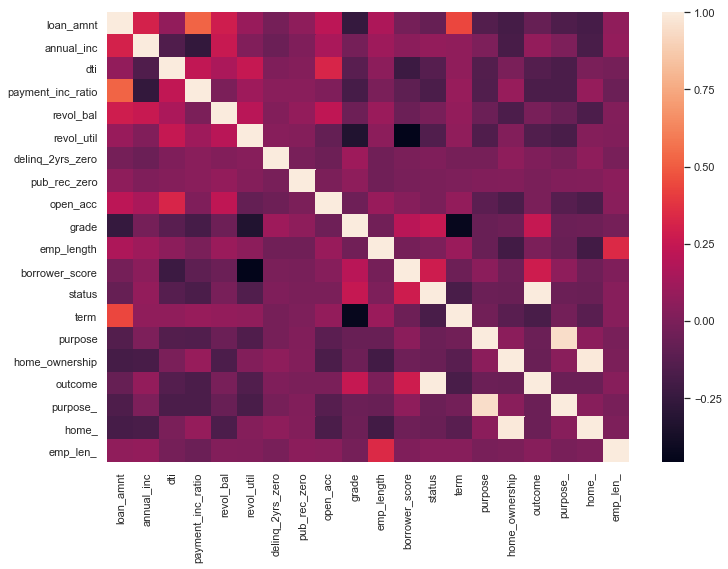

In [159]:
corr = df_encoded.corr()
sns.heatmap(corr)

In our dataset we have information about loan ```status``` and final ```oucome``` and those two looks simillar, let's check them relations:

In [155]:
import seaborn as sns

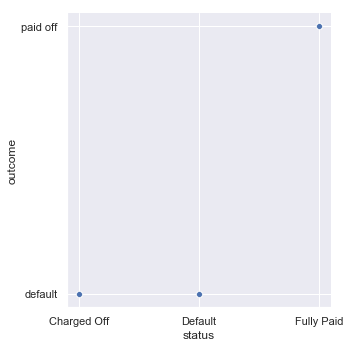

In [156]:
sns.relplot(x='status', y='outcome', data=df)

In [ ]:
sns.relplot(x='purpose', y='purpose', data=df_all)

# Fatures and target (X, y) split

Our challenge is to say if owner of this loan will default of paid off it. This information is in ```outcome``` column so let's assign it to oucome  

In [113]:
X = df.drop(['outcome', 'status'], axis=1)
y = df['outcome']
y.unique()

array(['default', 'paid off'], dtype=object)

# Train test split

In [88]:
RANDOM_STATE = 7 

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_STATE)

In [67]:
X_train.describe(include='all')

,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,emp_length,purpose_,home_,emp_len_,borrower_score
count,30379.000000,30379,3.037900e+04,30379.000000,30379.000000,3.037900e+04,30379.000000,30379,30379,30379.000000,30379.000000,30379.000000,30379.00000,30379.000000,30379,30379,30379,30379.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,12,4,NaN,NaN,NaN,NaN,NaN,7,3,2,NaN
top,NaN,36 months,NaN,NaN,NaN,NaN,NaN,debt_consolidation,MORTGAGE,NaN,NaN,NaN,NaN,NaN,debt_consolidation,MORTGAGE,> 1 Year,NaN
freq,NaN,22856,NaN,NaN,NaN,NaN,NaN,17137,14061,NaN,NaN,NaN,NaN,NaN,17137,14061,29203,NaN
mean,13171.964186,NaN,6.832479e+04,16.127758,8.029951,1.484020e+04,56.064996,NaN,NaN,0.856908,0.910958,10.416505,4.59871,6.343329,NaN,NaN,NaN,0.498887
std,8121.298884,NaN,6.087406e+04,7.605448,4.264873,1.867223e+04,25.419678,NaN,NaN,0.350173,0.284809,4.702062,1.48286,3.753284,NaN,NaN,NaN,0.128592
min,500.000000,NaN,3.600000e+03,0.000000,0.048892,0.000000e+00,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.20000,0.000000,NaN,NaN,NaN,0.050000
25%,7000.000000,NaN,4.200000e+04,10.430000,4.674580,5.663500e+03,37.900000,NaN,NaN,1.000000,1.000000,7.000000,3.60000,3.000000,NaN,NaN,NaN,0.400000
50%,11400.000000,NaN,6.000000e+04,15.940000,7.492150,1.075200e+04,58.400000,NaN,NaN,1.000000,1.000000,10.000000,4.80000,6.000000,NaN,NaN,NaN,0.500000
75%,18000.000000,NaN,8.100000e+04,21.610000,10.918000,1.858150e+04,76.400000,NaN,NaN,1.000000,1.000000,13.000000,5.80000,11.000000,NaN,NaN,NaN,0.600000


In [ ]:
df = df.drop(df.columns[0], axis=1)
df.head()

# Feature pre-processing

In [70]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [71]:
columnTransformer = ColumnTransformer([
    ('categorical', OneHotEncoder(), categorical_columns),
    ('normalizer', Normalizer(norm='l1'), numerical_columns),
    ('impute', SimpleImputer(strategy='mean'), numerical_columns)
])

# Pipleline

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [80]:
pipeline = Pipeline([
    ('pre_processing', columnTransformer),
    #('svm', SVC(kernel='linear'))
    ('randomForestClassifier', RandomForestClassifier(n_estimators=10, max_depth=4, random_state=RANDOM_STATE))
])

# Prediction

In [81]:
clf = pipeline.fit(X_train, y_train)

# Model evaluation

In [82]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

In [83]:
y_pred = clf.predict(X_test)

In [84]:
confusion_matrix(y_test, y_pred)

array([[4774, 2726],
       [2503, 4960]])